In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]

## [HPSC COVID-19 14-day Epidemiology Reports](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/)

This notebook uses data copied from the daily [HPSC COVID-19 14-day Epidemiology Reports](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/), from 2021-01-01 to 2021-05-07 (see the [generated CSV file](https://github.com/derekocallaghan/covid19data/tree/main/notebooks/data/HSPC_COVID_Epidmiology_14Day_Report.csv)). It is currently used to perform some exploratory analysis of age group hospitalisation.

In [3]:
df = pd.read_csv('./data/HSPC_COVID_Epidmiology_14Day_Report.csv', sep=" ", skiprows=13, parse_dates=["Date"], date_parser=lambda x: datetime.strptime(x, "%Y-%m-%d"))
df

,Date,Age Group (years),Number of cases (n),Cases hospitalised (n),Cases hospitalised (%),Cases admitted to ICU (n),Cases admitted to ICU (%)
0,2021-01-01,0-4,473,3,0.63,0,0.0
1,2021-01-01,5-12,831,8,0.96,0,0.0
2,2021-01-01,13-18,920,10,1.09,0,0.0
3,2021-01-01,19-24,2422,34,1.40,0,0.0
4,2021-01-01,25-34,3023,46,1.52,3,0.1
...,...,...,...,...,...,...,...
1268,2021-05-07,45-54,800,26,15.95,0,0.0
1269,2021-05-07,55-64,399,20,12.27,0,0.0
1270,2021-05-07,65-74,172,25,15.34,0,0.0
1271,2021-05-07,75+,70,15,9.20,0,0.0


### There appears to be an issue with the "Cases hospitalised (%)" for 2021-03-17 (total > 100%), so it's excluded for now. It has been confirmed that the [original report](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/covid-1914-dayepidemiologyreports/COVID-19%2014%20day%20epidemiology%20report_20210317%20website%20final.pdf) also contains this issue.

In [4]:
df[df.Date=='2021-03-17']

,Date,Age Group (years),Number of cases (n),Cases hospitalised (n),Cases hospitalised (%),Cases admitted to ICU (n),Cases admitted to ICU (%)
844,2021-03-17,0-4,480,18,3.75,0,0.0
845,2021-03-17,5-12,744,5,0.67,0,0.0
846,2021-03-17,13-18,595,15,2.52,0,0.0
847,2021-03-17,19-24,906,53,5.84,0,0.0
848,2021-03-17,25-34,1186,28,2.36,0,0.0
849,2021-03-17,35-44,1137,45,3.95,0,0.0
850,2021-03-17,45-54,821,50,6.09,0,0.0
851,2021-03-17,55-64,569,43,7.55,0,0.0
852,2021-03-17,65-74,340,55,16.17,0,0.0
853,2021-03-17,75-84,195,75,38.46,0,0.0


In [5]:
df = df[df.Date!='2021-03-17']

### Although there has been an increase in % hospitalisation for age groups 0-18 since approximately end of January, this is likely to be related to the corresponding decrease for age groups 75+.

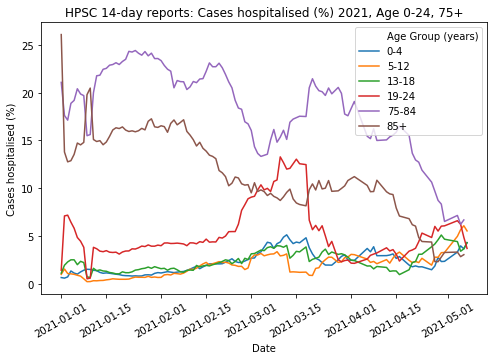

In [6]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24', '75-84', '85+']))], x='Date', y='Cases hospitalised (%)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases hospitalised (%) 2021, Age 0-24, 75+')
plt.xticks(rotation=30);

### Corresponding total cases hospitalised for these age groups

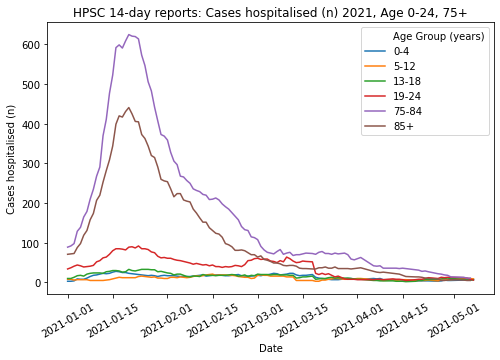

In [7]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24', '75-84', '85+']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases hospitalised (n) 2021, Age 0-24, 75+')
plt.xticks(rotation=30);

### Corresponding total cases hospitalised for age 0-18

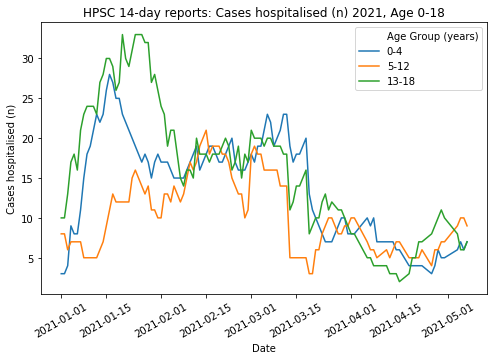

In [8]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day reports: Cases hospitalised (n) 2021, Age 0-18')
plt.xticks(rotation=30);

### The "*Cases hospitalised (%)*" column in the source data is the percentage for a particular age group of the total cases hospitalised. Here, the percentage of the corresponding age group "*Number of cases (n)*" is calculated.

In [9]:
df['AgeGroupHospPerc'] = df['Cases hospitalised (n)']*100/df['Number of cases (n)']
df.head()

,Date,Age Group (years),Number of cases (n),Cases hospitalised (n),Cases hospitalised (%),Cases admitted to ICU (n),Cases admitted to ICU (%),AgeGroupHospPerc
0,2021-01-01,0-4,473,3,0.63,0,0.0,0.634249
1,2021-01-01,5-12,831,8,0.96,0,0.0,0.962696
2,2021-01-01,13-18,920,10,1.09,0,0.0,1.086957
3,2021-01-01,19-24,2422,34,1.40,0,0.0,1.403799
4,2021-01-01,25-34,3023,46,1.52,3,0.1,1.521667


### Daily/fortnightly mean hospitalised/cases percentage for 0-18, 75+

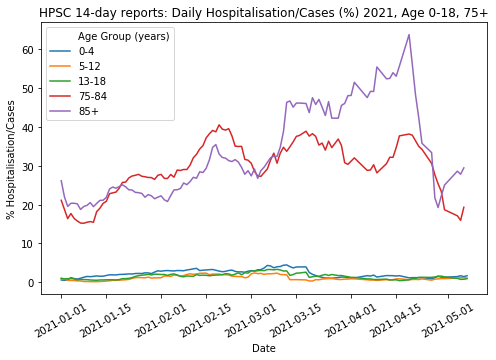

In [10]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '75-84', '85+']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Daily Hospitalisation/Cases (%) 2021, Age 0-18, 75+')
plt.xticks(rotation=30);


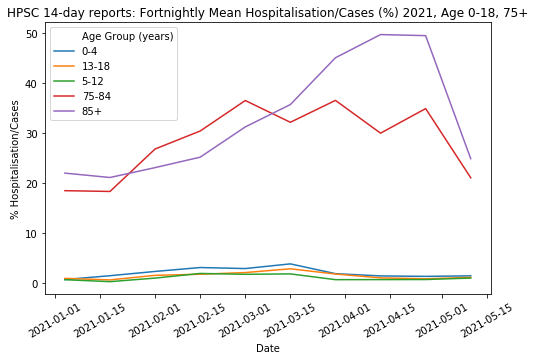

In [11]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '75-84', '85+']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%) 2021, Age 0-18, 75+')
plt.xticks(rotation=30);

### Daily/14D/fortnightly mean hospitalised/cases percentage for 0-24

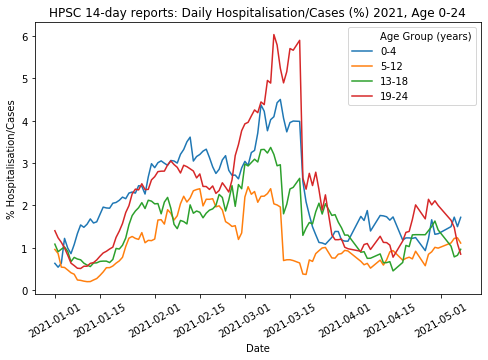

In [12]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Daily Hospitalisation/Cases (%) 2021, Age 0-24')
plt.xticks(rotation=30);

In [13]:
rdf = df[(df.Date>='2021-01-01')].copy()
rdf.Date = rdf.Date.dt.round('14D')

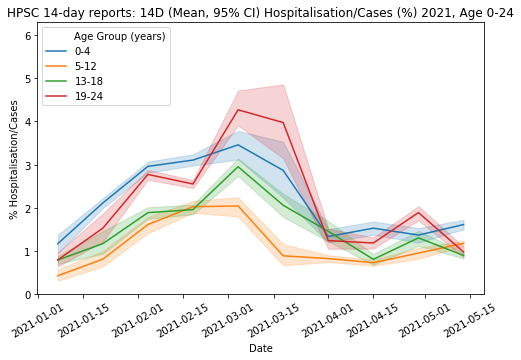

In [14]:
ax=sns.lineplot(data=rdf[(rdf["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)')
ax.set_ylim((0,6.3))
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: 14D (Mean, 95% CI) Hospitalisation/Cases (%) 2021, Age 0-24')
plt.legend(loc='upper left')
plt.xticks(rotation=30);

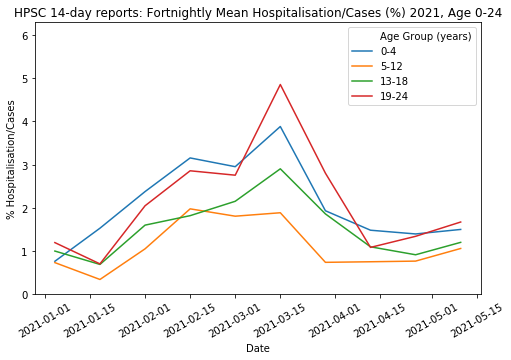

In [15]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24'])
ax.set_ylim((0,6.3))
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%) 2021, Age 0-24')
plt.xticks(rotation=30);

### Daily/14D/fortnightly mean hospitalised/cases percentage for all ages

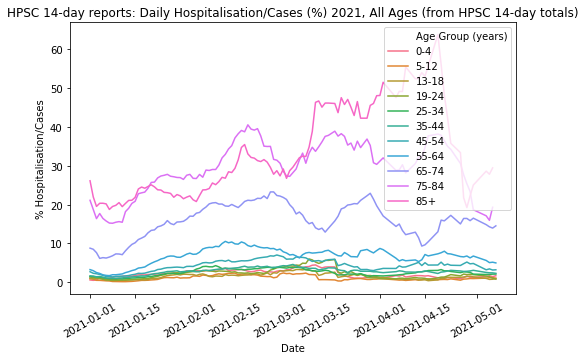

In [16]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Daily Hospitalisation/Cases (%) 2021, All Ages (from HPSC 14-day totals)')
plt.xticks(rotation=30);

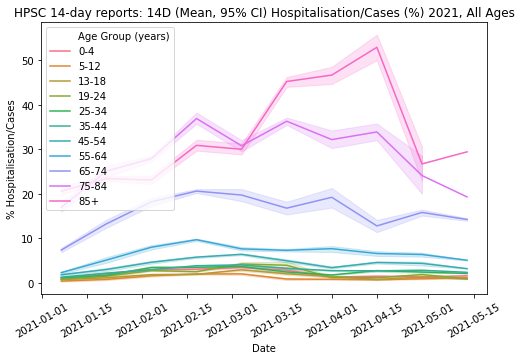

In [17]:
ax=sns.lineplot(data=rdf[(~rdf["Age Group (years)"].isin(['Unknown']))], x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: 14D (Mean, 95% CI) Hospitalisation/Cases (%) 2021, All Ages')
plt.legend(loc='upper left')
plt.xticks(rotation=30);

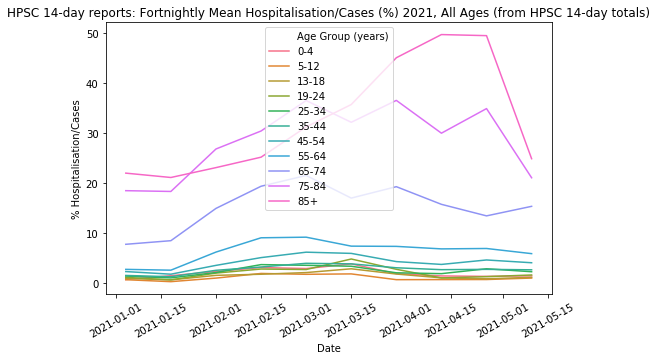

In [18]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))].groupby('Age Group (years)').resample('2W-MON', on='Date').mean().reset_index(), x='Date', y='AgeGroupHospPerc', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('HPSC 14-day reports: Fortnightly Mean Hospitalisation/Cases (%) 2021, All Ages (from HPSC 14-day totals)')
plt.xticks(rotation=30);

### 14-day total cases hospitalised for 0-24, all ages

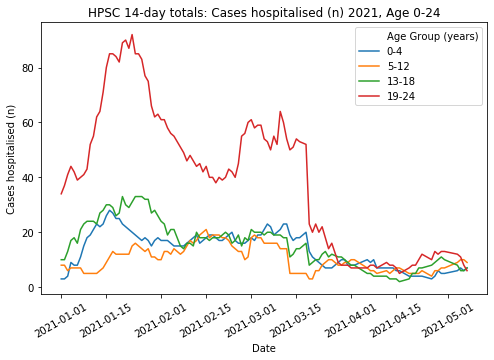

In [19]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (df["Age Group (years)"].isin(['0-4', '5-12', '13-18', '19-24']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)')
ax.set_title('HPSC 14-day totals: Cases hospitalised (n) 2021, Age 0-24')
plt.xticks(rotation=30);

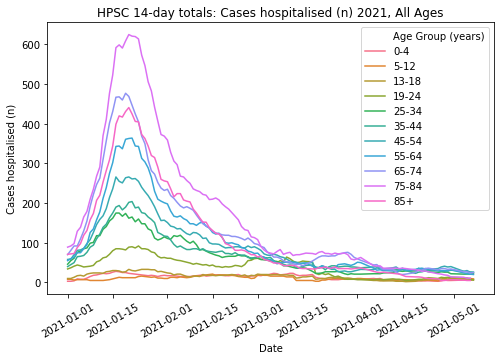

In [20]:
ax=sns.lineplot(data=df[(df.Date>='2021-01-01') & (~df["Age Group (years)"].isin(['Unknown']))], x='Date', y='Cases hospitalised (n)', hue='Age Group (years)', hue_order=['0-4', '5-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])
ax.set_title('HPSC 14-day totals: Cases hospitalised (n) 2021, All Ages')
plt.xticks(rotation=30);